#Nome: Marcus Vinícius Ribeiro
#R.A.: 688487 

##**Projeto Data Science**

O conjunto de dados contém uma lista de videogames com vendas superiores a 100.000 cópias entre os anos de 1986 e 2016. Foi gerado por meio de web scraping pelo vgchartz.com (Links para um site externo.) e apresenta as seguintes variáveis:

Nome -  nome dos jogos

Plataforma - plataforma do lançamento dos jogos (ou seja, PC, PS4, etc.)

Ano - ano de lançamento do jogo

Gênero - gênero do jogo

Produtor - Editora/produtora do jogo

NA - Vendas na América do Norte (em milhões)

EU - Vendas na Europa (em milhões)

JP - Vendas no Japão (em milhões)

RM - Vendas no resto do mundo (em milhões)

Global - Total de vendas mundiais

#**1- Top 5 dos jogos mais vendidos (considerando todos os anos)**

In [ ]:
!git clone "https://github.com/malegopc/DSBD"

import pandas as pd

df = pd.read_excel('DSBD/Datasets/Video_games/venda_video_games.xlsx', na_values=['?'])

df.nlargest(5,'Global')[['Nome','Global']]

#o trecho abaixo se aplica na questão 7, estava dando um bug na hora de ler a coluna pois interpretava como int e não como string
df['Plataforma'] = df['Plataforma'].astype(str) #debug da coluna plataforma, devido a uma plataforma que o nome é apenas numeros, fazendo o python reconhecer como int e não string

fatal: destination path 'DSBD' already exists and is not an empty directory.


# **2- Mostrar a distribuição de frequências (contagem) de todos os gêneros de jogos. Você deve apresentar uma listagem em ordem decrescente (dos gêneros de jogos mais lançados até os menos lançados). Apresente também um gráfico de barras (ou histograma) da distribuição (contagem) dos gêneros em ordem decrescente**

              Nome  Plataforma   Ano  Produtor    NA    EU    JP    RM  Global
Gênero                                                                        
Action        3249        3249  3249      3247  3249  3249  3249  3249    3249
Sports        2304        2304  2304      2304  2304  2304  2304  2304    2304
Misc          1710        1710  1710      1686  1710  1710  1710  1710    1710
Role-Playing  1469        1469  1469      1468  1469  1469  1469  1469    1469
Shooter       1282        1282  1282      1282  1282  1282  1282  1282    1282
Adventure     1253        1253  1253      1251  1253  1253  1253  1253    1253
Racing        1226        1226  1226      1225  1226  1226  1226  1226    1226
Platform       876         876   876       875   876   876   876   876     876
Simulation     850         850   850       847   850   850   850   850     850
Fighting       836         836   836       836   836   836   836   836     836
Strategy       671         671   671       670   671

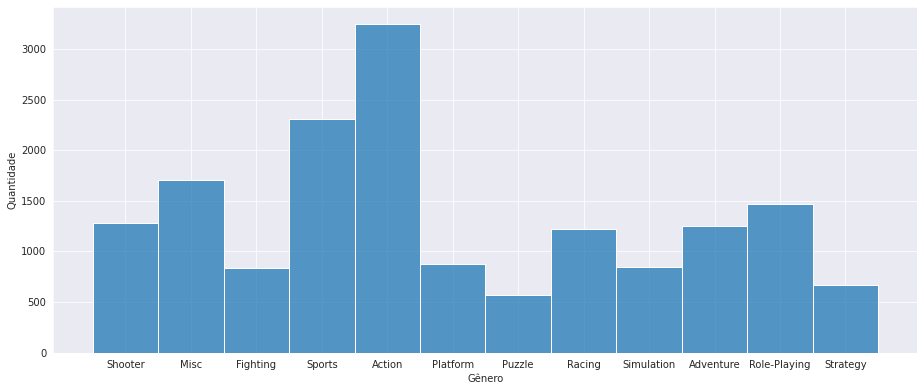

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

dados = df.groupby(by=['Gênero']).count()
print(dados.sort_values(by=['Nome'],ascending=False))

sns.histplot(data=df, x="Gênero")
plt.ylabel("Quantidade")
plt.subplots_adjust(left=-0.5,
                    bottom=-0.2, 
                    right=1.5, 
                    top=1, 
                    wspace=0.2, 
                    hspace=0.9)
sns.set_style('darkgrid')
plt.show()

# **3- Número de jogos lançados por ano (mostrar listagem numérica e gráfico);**

     Ano  Nome
0   1980     9
1   1981    46
2   1982    36
3   1983    17
4   1984    14
5   1985    14
6   1986    21
7   1987    16
8   1988    15
9   1989    17
10  1990    16
11  1991    41
12  1992    43
13  1993    60
14  1994   121
15  1995   219
16  1996   263
17  1997   289
18  1998   379
19  1999   338
20  2000   349
21  2001   482
22  2002   829
23  2003   775
24  2004   763
25  2005   941
26  2006  1008
27  2007  1201
28  2008  1428
29  2009  1429
30  2010  1257
31  2011  1136
32  2012   652
33  2013   543
34  2014   578
35  2015   608
36  2016   344


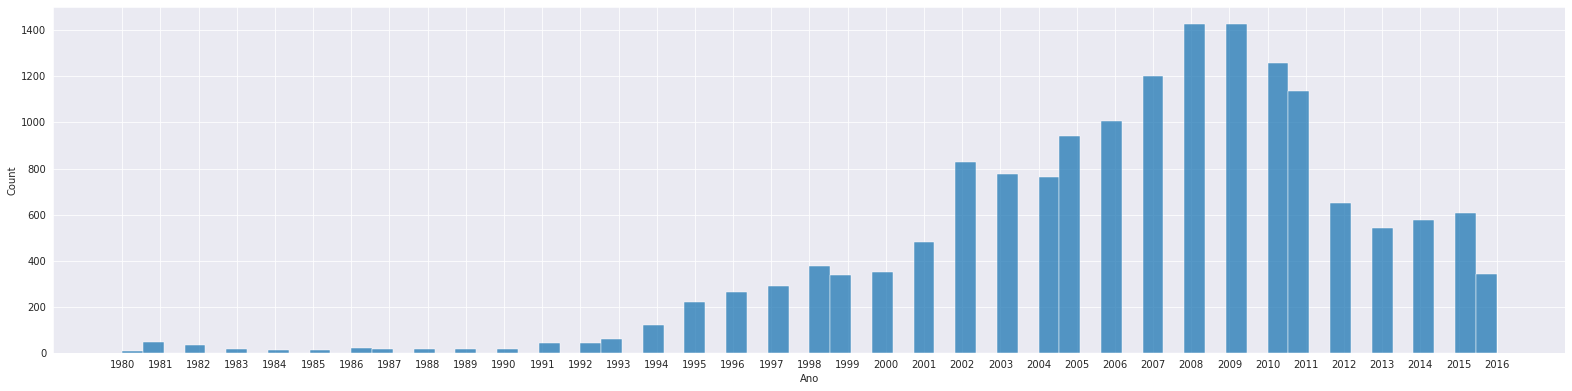

In [ ]:
dados = df.groupby(by=['Ano'], as_index=False)['Nome'].count()

print(dados)

sns.histplot(data=df, x="Ano")
plt.xticks(range(df['Ano'].min(), df['Ano'].max() + 1))
plt.subplots_adjust(left=-0.5,
                    bottom=-0.2, 
                    right=3.0, 
                    top=1, 
                    wspace=0.5, 
                    hspace=0.9)
plt.show()

# **4- Volume de vendas globais por ano (mostrar listagem numérica e gráfico)**

     Ano  Global
0   1980   11.38
1   1981   35.77
2   1982   28.86
3   1983   16.79
4   1984   50.36
5   1985   53.94
6   1986   37.07
7   1987   21.74
8   1988   47.22
9   1989   73.45
10  1990   49.39
11  1991   32.23
12  1992   76.16
13  1993   45.98
14  1994   79.17
15  1995   88.11
16  1996  199.15
17  1997  200.98
18  1998  256.47
19  1999  251.27
20  2000  201.56
21  2001  331.47
22  2002  395.52
23  2003  357.85
24  2004  419.31
25  2005  459.94
26  2006  521.04
27  2007  611.12
28  2008  678.90
29  2009  667.20
30  2010  600.40
31  2011  515.68
32  2012  363.25
33  2013  367.82
34  2014  336.81
35  2015  264.24
36  2016   70.93


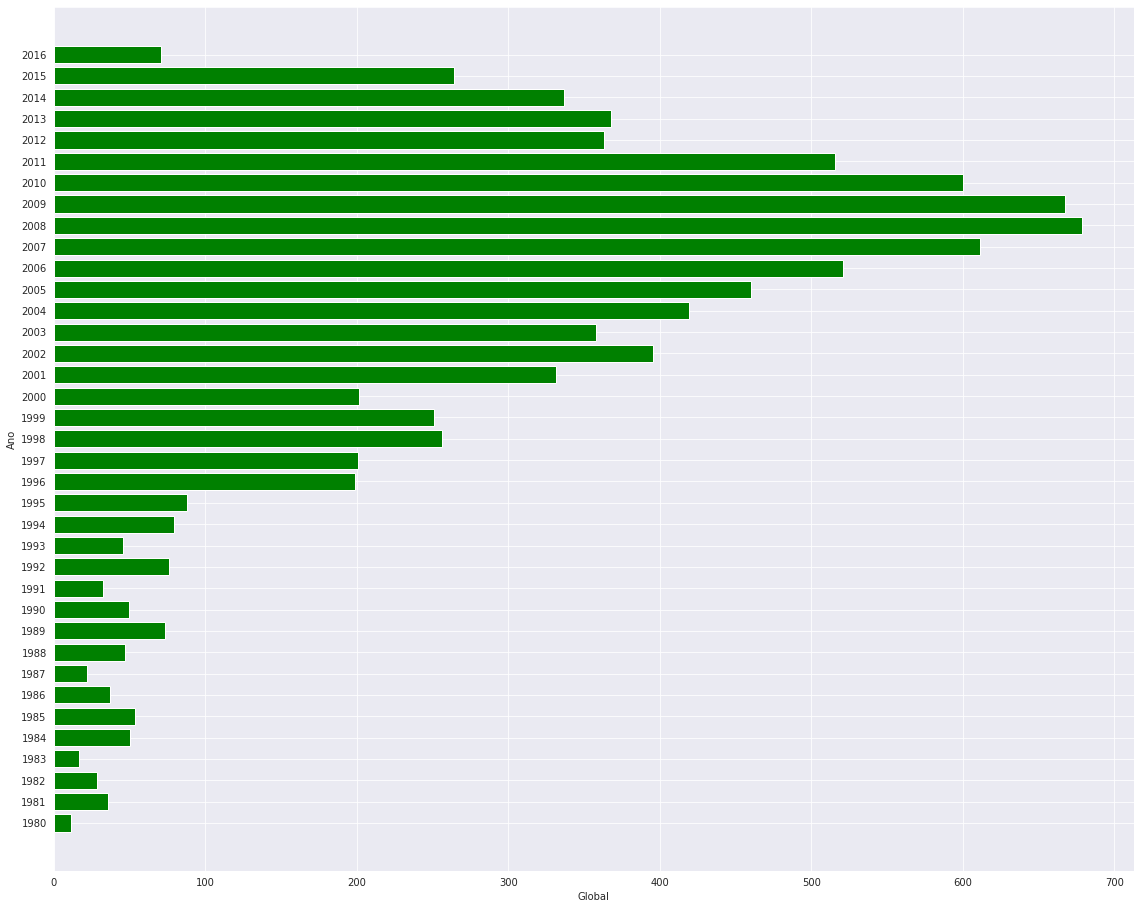

In [ ]:
df2 = df.groupby(by=['Ano'], as_index=False)['Global'].sum()
print(df2)

plt.barh(df2['Ano'], df2['Global'], color='green')
plt.subplots_adjust(left=1.5,
                    bottom=3, 
                    right=4.0, 
                    top=6, 
                    wspace=0.2, 
                    hspace=0.9)

plt.yticks(range(df2['Ano'].min(), df2['Ano'].max() + 1))
plt.xlabel('Global')
plt.ylabel('Ano')
plt.show()


# **5- Volume de vendas globais por gênero (mostrar listagem numérica e gráfico)**

          Gênero   Global
0         Action  1722.60
1      Adventure   233.58
2       Fighting   444.05
3           Misc   797.62
4       Platform   829.15
5         Puzzle   242.22
6         Racing   726.77
7   Role-Playing   923.80
8        Shooter  1026.20
9     Simulation   389.87
10        Sports  1309.24
11      Strategy   173.43


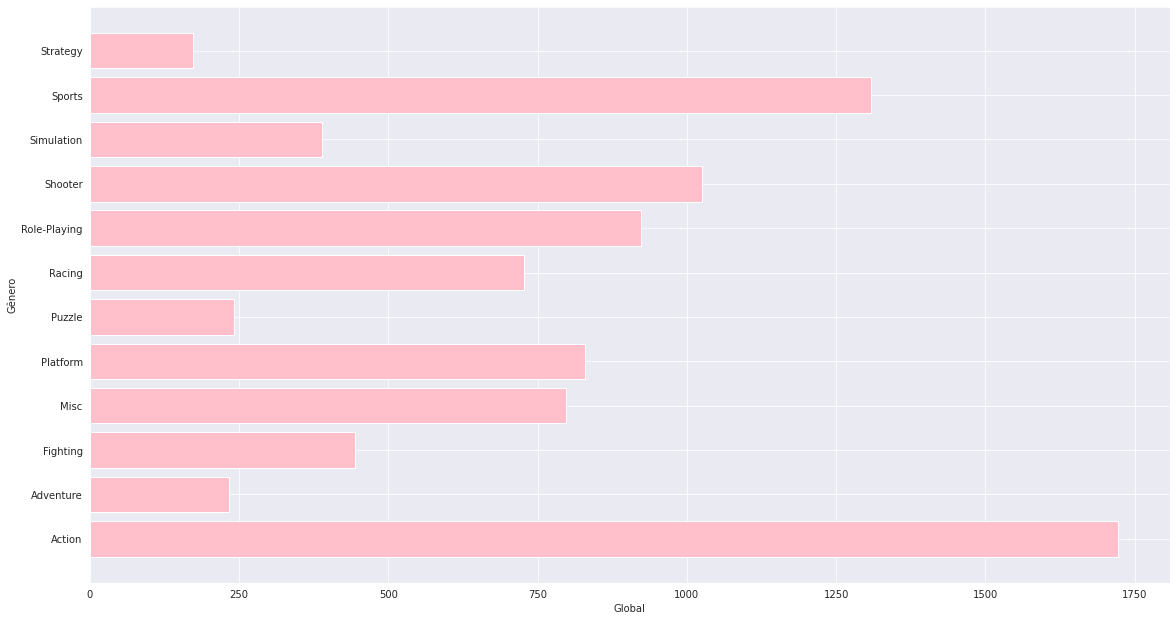

In [ ]:
df2 = df.groupby(by=['Gênero'], as_index=False)['Global'].sum()
print(df2)

plt.barh(df2['Gênero'], df2['Global'], color='pink')
plt.subplots_adjust(left=1.5,
                    bottom=3, 
                    right=4.0, 
                    top=5, 
                    wspace=0.2, 
                    hspace=0.9)

plt.xlabel('Global')
plt.ylabel('Gênero')
plt.show()

#**6- Mostrar a distribuição de frequências (contagem) de todas as plataformas de jogos. Da mesma forma que o item 2 (listagem e gráfico de barras).**

Plataforma
2600     116
3DO        3
3DS      500
DC        52
DS      2132
GB        97
GBA      811
GC       542
GEN       27
GG         1
N64      316
NES       98
NG        12
PC       943
PCFX       1
PS      1189
PS2     2126
PS3     1298
PS4      333
PSP     1193
PSV      403
SAT      173
SCD        6
SNES     239
TG16       2
WS         6
Wii     1290
WiiU     143
X360    1229
XB       803
XOne     213
Name: Nome, dtype: int64


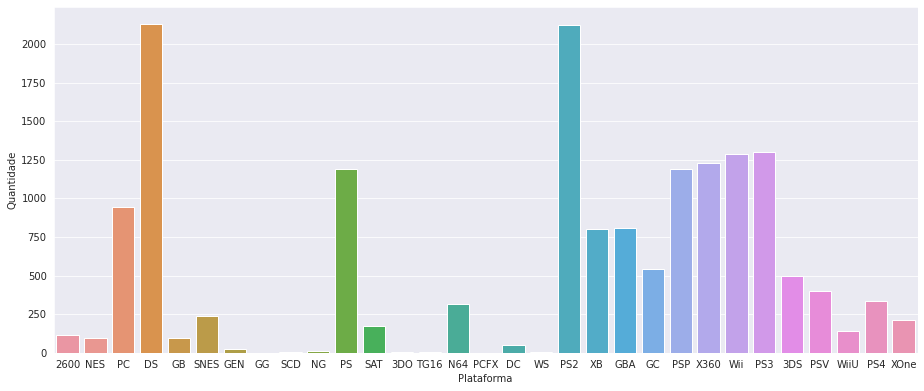

In [ ]:
df2 = df.groupby(by=['Plataforma'])['Nome'].count()
print(df2)

sns.countplot(x='Plataforma', data=df)
plt.ylabel("Quantidade")
plt.subplots_adjust(left=-0.5,
                    bottom=-0.2, 
                    right=1.5, 
                    top=1, 
                    wspace=0.2, 
                    hspace=0.9)
plt.show()

# **7- Volume de vendas globais por plataforma (mostrar listagem numérica e gráfico)**

   Plataforma   Global
0        2600    86.57
1         3DO     0.10
2         3DS   246.28
3          DC    15.97
4          DS   818.67
5          GB   254.42
6         GBA   313.56
7          GC   197.14
8         GEN    28.36
9          GG     0.04
10        N64   218.21
11        NES   251.07
12         NG     1.44
13         PC   255.05
14       PCFX     0.03
15         PS   727.39
16        PS2  1233.45
17        PS3   949.04
18        PS4   278.01
19        PSP   291.40
20        PSV    61.06
21        SAT    33.59
22        SCD     1.87
23       SNES   200.05
24       TG16     0.16
25         WS     1.42
26        Wii   909.81
27       WiiU    81.86
28       X360   969.36
29         XB   252.09
30       XOne   141.06


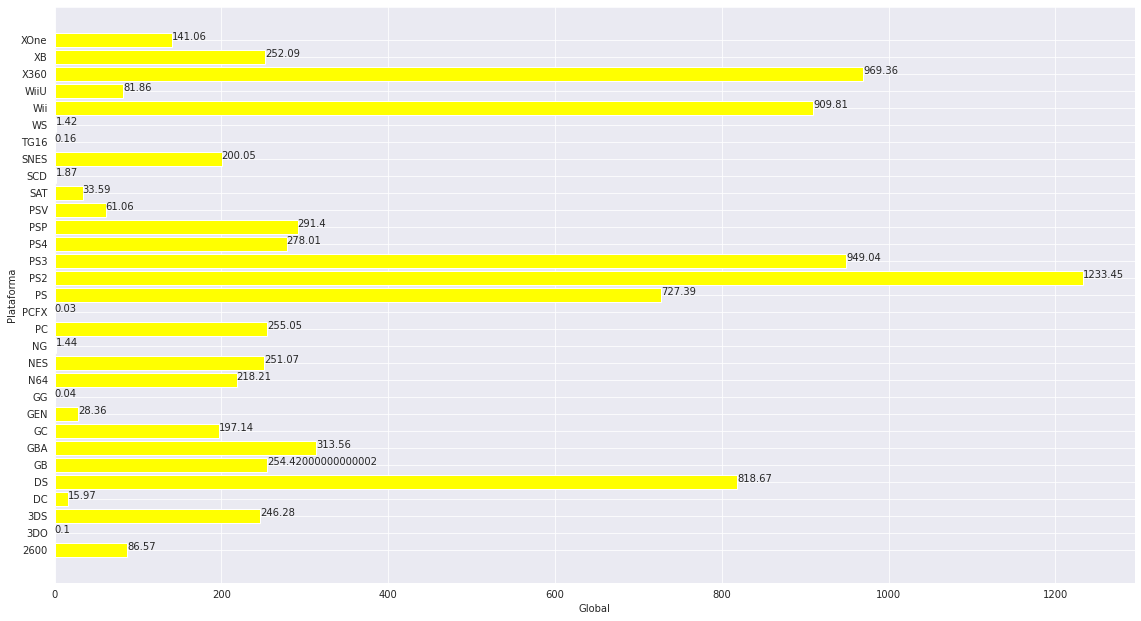

In [ ]:
df2 = df.groupby(by=['Plataforma'], as_index=False)['Global'].sum()
print(df2)

plt.barh(df2['Plataforma'], df2['Global'], color='yellow')
plt.subplots_adjust(left=1.5,
                    bottom=3, 
                    right=4.0, 
                    top=5, 
                    wspace=0.2, 
                    hspace=0.9)

for index, value in enumerate(df2['Global']): 
    plt.text(value, index, 
             str(value)) 

plt.xlabel('Global')
plt.ylabel('Plataforma')
plt.show()

# **8- Top 10 das produtoras (pelo número de jogos)**

In [ ]:
df2 = df.groupby(by=['Produtor'], as_index=False)['Nome'].count()

df2.sort_values(by='Nome', ascending=False).head(10)


,Produtor,Nome
138,Electronic Arts,1339
21,Activision,966
347,Namco Bandai Games,928
524,Ubisoft,917
275,Konami Digital Entertainment,823
487,THQ,712
359,Nintendo,696
455,Sony Computer Entertainment,682
445,Sega,630
493,Take-Two Interactive,412


# **9- Mostrar a proporção de venda de cada região (NA, EU, JP, RM) no total da venda global (mostrar por meio de um pie chart)**

NA    4332.96
EU    2408.96
JP    1283.24
RM     788.88
dtype: float64


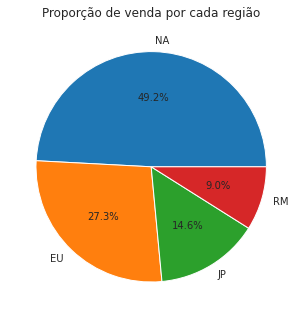

In [ ]:
df2 = pd.DataFrame(df, columns = ['NA','EU','JP','RM'])
df3 = df2.sum()
labels = list(df2.columns)

print(df3)

plt.pie(df3, labels = labels,autopct='%1.1f%%')
plt.title('Proporção de venda por cada região')
plt.subplots_adjust(left=1.5,
                    bottom=2, 
                    right=4.0, 
                    top=3, 
                    wspace=0.2, 
                    hspace=0.9)
plt.show()

# **10- Correlação de vendas entre NA, EU, JP, RM e Global (mostrar matriz de correlação e mapa de calor)**

              NA        EU        JP        RM    Global
NA      1.000000  0.768903  0.451266  0.634464  0.941259
EU      0.768903  1.000000  0.436390  0.726235  0.903258
JP      0.451266  0.436390  1.000000  0.290622  0.612786
RM      0.634464  0.726235  0.290622  1.000000  0.747946
Global  0.941259  0.903258  0.612786  0.747946  1.000000


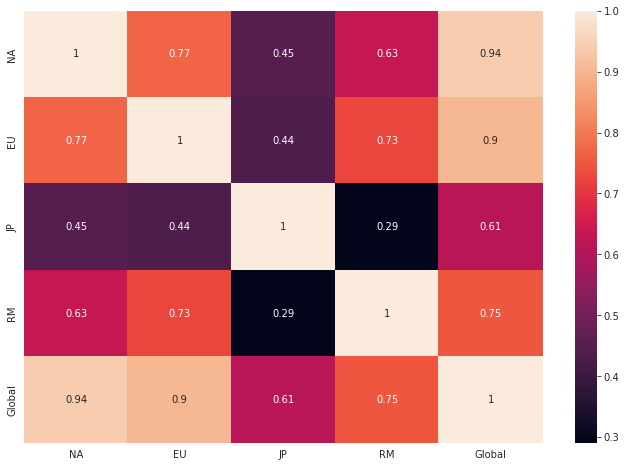

In [ ]:
df2 = pd.DataFrame(df, columns = ['NA','EU','JP','RM','Global'])
corrMatrix = df2.corr()
print(corrMatrix)

sns.heatmap(corrMatrix, annot=True)
plt.subplots_adjust(left=1.5,
                    bottom=3, 
                    right=3.0, 
                    top=4.5, 
                    wspace=0.2, 
                    hspace=0.9)
plt.show()

# **11- Comparar o volume de vendas por ano das plataformas Xbox One e PS4 (mostre por meio de um gráfico de barras)**

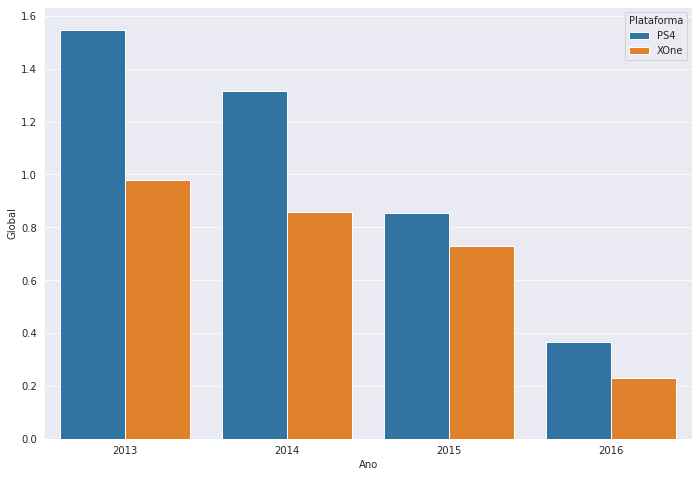

In [ ]:
df2 = df.loc[(df['Plataforma'] == 'PS4') | (df['Plataforma'] == 'XOne')]

sns.barplot(x = df2['Ano'], y = df2['Global'], hue = df2['Plataforma'],ci=0)

plt.subplots_adjust(left=1.5,
                    bottom=4, 
                    right=3.0, 
                    top=5.5, 
                    wspace=0.2, 
                    hspace=0.9)
plt.show()

# **12- Mostrar por meio de boxplots o grau de dispersão em cada ano das vendas globais das plataformas Xbox One e PS4 (mostrar num mesmo plot)**

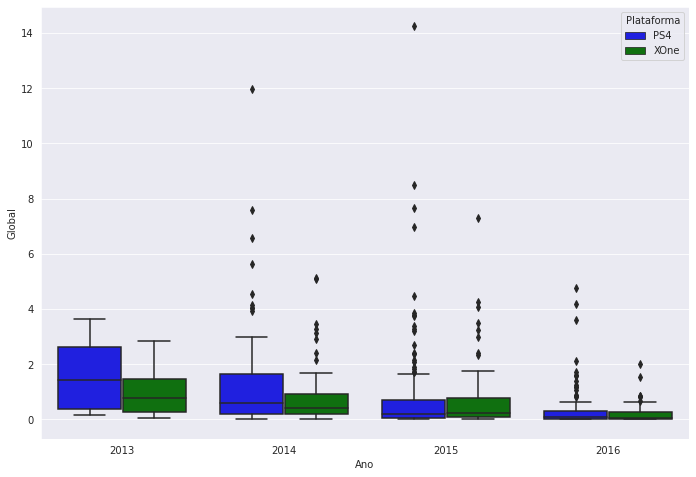

In [ ]:
df2 = df.loc[(df['Plataforma'] == 'PS4') | (df['Plataforma'] == 'XOne')]

sns.boxplot(x=df2['Ano'], y=df2['Global'], hue=df2['Plataforma'], palette=["b", "g"])
#sns.despine(offset=10, trim=True)
plt.subplots_adjust(left=1.5,
                    bottom=4, 
                    right=3.0, 
                    top=5.5, 
                    wspace=0.2, 
                    hspace=0.9)
plt.show()